In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)        # Don't wrap lines
pd.set_option('display.expand_frame_repr', False)  # Don't break into multiple lines
pd.set_option('display.float_format', '{:.2f}'.format)

## somme de 100000000 nombre O(n)

In [5]:
import time
import numba

# Fonction sans Numba
def ma_fonction_sans_numba(n):
    resultat = 0
    for i in range(n):
        resultat += i
    return resultat

# Fonction avec Numba (décorateur @jit)
@numba.jit(nopython=True)
def ma_fonction_avec_numba(n):
    resultat = 0
    for i in range(n):
        resultat += i
    return resultat

# Taille du problème (nombre d'itérations)
taille = 100000000

# Mesurer le temps d'exécution sans Numba
debut_sans_numba = time.time()
resultat_sans_numba = ma_fonction_sans_numba(taille)
fin_sans_numba = time.time()
temps_sans_numba = fin_sans_numba - debut_sans_numba
print(f"Temps d'exécution sans Numba: {temps_sans_numba:.4f} secondes, Résultat: {resultat_sans_numba}")

# Mesurer le temps d'exécution avec Numba
# La première exécution avec Numba peut prendre un peu plus de temps à cause de la compilation
# On l'exécute une première fois pour ne pas inclure le temps de compilation dans la mesure principale
ma_fonction_avec_numba(taille)

debut_avec_numba = time.time()
resultat_avec_numba = ma_fonction_avec_numba(taille)
fin_avec_numba = time.time()
temps_avec_numba = fin_avec_numba - debut_avec_numba
print(f"Temps d'exécution avec Numba: {temps_avec_numba:.4f} secondes, Résultat: {resultat_avec_numba}")

if temps_avec_numba > 0:
    amelioration = temps_sans_numba / temps_avec_numba
    print(f"\nAmélioration de la vitesse (Numba vs sans Numba): {amelioration:.2f}x")
else:
    print("\nLe temps d'exécution avec Numba est tellement court qu'il ne peut être mesuré précisément avec cette précision.")

Temps d'exécution sans Numba: 12.7255 secondes, Résultat: 4999999950000000
Temps d'exécution avec Numba: 0.0119 secondes, Résultat: 4999999950000000

Amélioration de la vitesse (Numba vs sans Numba): 1072.92x


## Rechrcher un element parmis 1000000 elements

In [19]:
import time

# Taille du dataset
taille = 1000000000

# Création d'une liste
ma_liste = list(range(taille))

# Création d'un ensemble (contenant les mêmes éléments que la liste)
mon_ensemble = set(range(taille))

# Élément à rechercher
element_a_rechercher = taille - 10

# Mesurer le temps de recherche dans la liste
debut_recherche_liste = time.time()
if element_a_rechercher in ma_liste:
    pass  # Simplement vérifier la présence
fin_recherche_liste = time.time()
temps_recherche_liste = fin_recherche_liste - debut_recherche_liste
print(f"Temps de recherche dans la liste: {temps_recherche_liste:.6f} secondes")

# Mesurer le temps de recherche dans l'ensemble
debut_recherche_ensemble = time.time()
if element_a_rechercher in mon_ensemble:
    pass  # Simplement vérifier la présence
fin_recherche_ensemble = time.time()
temps_recherche_ensemble = fin_recherche_ensemble - debut_recherche_ensemble
print(f"Temps de recherche dans l'ensemble: {temps_recherche_ensemble:.6f} secondes")

# Comparaison
print(f"\nLa recherche dans l'ensemble est environ {temps_recherche_liste / temps_recherche_ensemble:.2f} fois plus rapide que dans la liste pour cette opération.")

Temps de recherche dans la liste: 20.291371 secondes
Temps de recherche dans l'ensemble: 0.000000 secondes


ZeroDivisionError: float division by zero

## Verifier l'existance d'une arete entre deux noeuds

In [25]:
import time
import random

def generate_graph(num_nodes, num_edges):
    """Génère un graphe aléatoire pour la comparaison."""
    adj_list = {i: [] for i in range(num_nodes)}
    edges = set()
    while len(edges) < num_edges:
        u = random.randint(0, num_nodes - 1)
        v = random.randint(0, num_nodes - 1)
        if u != v and (u, v) not in edges and (v, u) not in edges:
            adj_list[u].append(v)
            adj_list[v].append(u)  # Graphe non orienté
            edges.add((u, v))
    return adj_list

def adj_list_to_matrix(adj_list, num_nodes):
    """Convertit une liste d'adjacence en matrice d'adjacence."""
    matrix = [[0 for _ in range(num_nodes)] for _ in range(num_nodes)]
    for u, neighbors in adj_list.items():
        for v in neighbors:
            matrix[u][v] = 1
    return matrix

# Paramètres du graphe
nombre_nodes = 500
nombre_edges = 1000  # Graphe relativement creux

# Générer le graphe et ses représentations
graphe_adj_liste = generate_graph(nombre_nodes, nombre_edges)
matrice_adj = adj_list_to_matrix(graphe_adj_liste, nombre_nodes)

# Choisir deux nœuds aléatoires pour vérifier l'arête
node1 = random.randint(0, nombre_nodes - 1)
node2 = random.randint(0, nombre_nodes - 1)

# Nombre de répétitions pour une mesure plus précise
nombre_repetitions = 1000

# Mesurer le temps de recherche d'arête dans la liste d'adjacence
debut_liste = time.time()
for _ in range(nombre_repetitions):
    voisins = graphe_adj_liste.get(node1, [])
    est_connecte_liste = node2 in voisins
fin_liste = time.time()
temps_liste = fin_liste - debut_liste
temps_moyen_liste = temps_liste / nombre_repetitions

# Mesurer le temps de recherche d'arête dans la matrice d'adjacence
debut_matrice = time.time()
for _ in range(nombre_repetitions):
    est_connecte_matrice = matrice_adj[node1][node2] == 1
fin_matrice = time.time()
temps_matrice = fin_matrice - debut_matrice
temps_moyen_matrice = temps_matrice / nombre_repetitions

print(f"Nombre de nœuds: {nombre_nodes}, Nombre d'arêtes: {nombre_edges}")
print(f"\nTemps moyen pour vérifier l'arête ({nombre_repetitions} répétitions):")
print(f"  Liste d'adjacence: {temps_moyen_liste:.8f} secondes")
print(f"  Matrice d'adjacence: {temps_moyen_matrice:.8f} secondes")

if temps_moyen_matrice < temps_moyen_liste:
    print("\nLa vérification d'arête est plus rapide avec la matrice d'adjacence.")
elif temps_moyen_matrice > temps_moyen_liste:
    print("\nLa vérification d'arête est plus rapide avec la liste d'adjacence.")
else:
    print("\nLes temps de vérification d'arête sont similaires pour les deux représentations.")

print()

Nombre de nœuds: 500, Nombre d'arêtes: 1000

Temps moyen pour vérifier l'arête (1000 répétitions):
  Liste d'adjacence: 0.00000000 secondes
  Matrice d'adjacence: 0.00000306 secondes

La vérification d'arête est plus rapide avec la liste d'adjacence.



## Concatenation de string Explication : Numba fonctionne mieux avec des opérations numériques. 

In [8]:
import time
import numba

def fonction_sans_numba_str(n):
    resultat = ""
    for i in range(n):
        resultat += str(i)
    return resultat

@numba.jit(nopython=True)
def fonction_avec_numba_str(n):
    resultat = ""
    for i in range(n):
        resultat += str(i)
    return resultat

taille = 5000

debut_sans_numba = time.time()
resultat_sans_numba = fonction_sans_numba_str(taille)
fin_sans_numba = time.time()
temps_sans_numba = fin_sans_numba - debut_sans_numba
print(f"Temps d'exécution sans Numba: {temps_sans_numba:.4f} secondes")

debut_avec_numba = time.time()
resultat_avec_numba = fonction_avec_numba_str(taille)
fin_avec_numba = time.time()
temps_avec_numba = fin_avec_numba - debut_avec_numba
print(f"Temps d'exécution avec Numba: {temps_avec_numba:.4f} secondes")

Temps d'exécution sans Numba: 0.0079 secondes
Temps d'exécution avec Numba: 4.1847 secondes


# Trouver tous les voisins d'un nœud dans un graphe creux

In [9]:
import time
import random

def generate_sparse_graph(num_nodes, num_edges):
    adj_list = {i: set() for i in range(num_nodes)}
    for _ in range(num_edges):
        u = random.randint(0, num_nodes - 1)
        v = random.randint(0, num_nodes - 1)
        if u != v:
            adj_list[u].add(v)
            adj_list[v].add(u)
    return adj_list

def adj_list_to_matrix(adj_list, num_nodes):
    matrix = [[0 for _ in range(num_nodes)] for _ in range(num_nodes)]
    for u, neighbors in adj_list.items():
        for v in neighbors:
            matrix[u][v] = 1
            matrix[v][u] = 1
    return matrix

nombre_nodes = 1000
nombre_edges = 2000  # Graphe creux

graphe_adj_liste = generate_sparse_graph(nombre_nodes, nombre_edges)
matrice_adj = adj_list_to_matrix(graphe_adj_liste, nombre_nodes)

noeud_cible = random.randint(0, nombre_nodes - 1)
nombre_repetitions = 1000

# Temps pour obtenir les voisins via la liste d'adjacence
debut_liste = time.time()
for _ in range(nombre_repetitions):
    voisins_liste = graphe_adj_liste.get(noeud_cible, [])
fin_liste = time.time()
temps_liste = fin_liste - debut_liste
temps_moyen_liste = temps_liste / nombre_repetitions
print(f"Temps moyen pour obtenir les voisins (liste d'adjacence): {temps_moyen_liste:.8f} secondes")

# Temps pour obtenir les voisins via la matrice d'adjacence
debut_matrice = time.time()
for _ in range(nombre_repetitions):
    voisins_matrice = [i for i, connected in enumerate(matrice_adj[noeud_cible]) if connected == 1]
fin_matrice = time.time()
temps_matrice = fin_matrice - debut_matrice
temps_moyen_matrice = temps_matrice / nombre_repetitions
print(f"Temps moyen pour obtenir les voisins (matrice d'adjacence): {temps_moyen_matrice:.8f} secondes")

Temps moyen pour obtenir les voisins (liste d'adjacence): 0.00000202 secondes
Temps moyen pour obtenir les voisins (matrice d'adjacence): 0.00018554 secondes


## Simulation app Multithreaded

Début des tests d'exécution avec différentes nombre de threads:

--- Test avec 1 threads ---
Thread 1 terminé. Résultat partiel: 49995000

Temps d'exécution total avec 1 threads: 7.3111 secondes

--- Test avec 4 threads ---
Thread 4 terminé. Résultat partiel: 199980000
Thread 1 terminé. Résultat partiel: 49995000
Thread 3 terminé. Résultat partiel: 149985000
Thread 2 terminé. Résultat partiel: 99990000

Temps d'exécution total avec 4 threads: 6.6045 secondes

--- Test avec 8 threads ---
Thread 1 terminé. Résultat partiel: 49995000
Thread 3 terminé. Résultat partiel: 149985000
Thread 8 terminé. Résultat partiel: 399960000
Thread 4 terminé. Résultat partiel: 199980000
Thread 2 terminé. Résultat partiel: 99990000
Thread 6 terminé. Résultat partiel: 299970000
Thread 7 terminé. Résultat partiel: 349965000
Thread 5 terminé. Résultat partiel: 249975000

Temps d'exécution total avec 8 threads: 6.0686 secondes

--- Test avec 16 threads ---
Thread 6 terminé. Résultat partiel: 299970000
Thread 1 

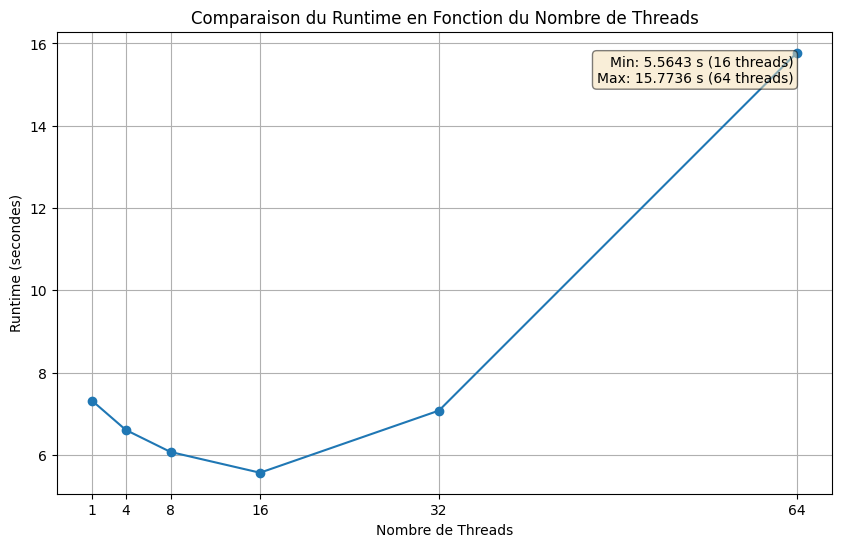

In [21]:
import threading
import time
import matplotlib.pyplot as plt

def tache(identifiant, n):
    """Simule une tâche qui prend du temps."""
    resultat = 0
    for i in range(n):
        resultat += i * identifiant
        time.sleep(0.0001) # Simuler un peu d'IO ou de travail
    print(f"Thread {identifiant} terminé. Résultat partiel: {resultat}")

def execution_avec_threads(nombre_threads, taille_tache):
    """Exécute des tâches en utilisant des threads et mesure le runtime."""
    threads = []
    start_time = time.time()
    for i in range(nombre_threads):
        thread = threading.Thread(target=tache, args=(i + 1, taille_tache))
        threads.append(thread)
        thread.start()

    for thread in threads:
        thread.join()

    end_time = time.time()
    runtime = end_time - start_time
    print(f"\nTemps d'exécution total avec {nombre_threads} threads: {runtime:.4f} secondes")
    return runtime


if __name__ == "__main__":
    nombre_threads_a_tester = [1, 4, 8, 16, 32, 64]
    taille_de_la_tache = 10000
    runtimes = []
    profiling_outputs = {}

    print("Début des tests d'exécution avec différentes nombre de threads:")
    for num_threads in nombre_threads_a_tester:
        print(f"\n--- Test avec {num_threads} threads ---")
        runtime = execution_avec_threads(num_threads, taille_de_la_tache)
        runtimes.append(runtime)

    min_runtime = min(runtimes)
    max_runtime = max(runtimes)

    min_runtime_index = runtimes.index(min_runtime)
    max_runtime_index = runtimes.index(max_runtime)

    threads_min_runtime = nombre_threads_a_tester[min_runtime_index]
    threads_max_runtime = nombre_threads_a_tester[max_runtime_index]

    # Préparation des données pour la courbe
    plt.figure(figsize=(10, 6))
    plt.plot(nombre_threads_a_tester, runtimes, marker='o')
    plt.title("Comparaison du Runtime en Fonction du Nombre de Threads")
    plt.xlabel("Nombre de Threads")
    plt.ylabel("Runtime (secondes)")
    plt.xticks(nombre_threads_a_tester) # Ensure all thread numbers are on x-axis
    plt.grid(True)

    # Ajouter le min et max runtime et nombre de threads en haut à droite
    textstr = '\n'.join((
        f'Min: {min_runtime:.4f} s ({threads_min_runtime} threads)',
        f'Max: {max_runtime:.4f} s ({threads_max_runtime} threads)'))

    # Ces propriétés personnalisées peuvent être facilement ajustées
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

    # Placez un bloc de texte dans l'axe en haut à droite.
    plt.text(0.95, 0.95, textstr, transform=plt.gca().transAxes, fontsize=10,
            verticalalignment='top', horizontalalignment='right', bbox=props)

    # Afficher le graphique
    plt.show()

Début des tests d'exécution avec 16 threads, 5 fois:

--- Exécution 1 ---
Thread 1 terminé. Résultat partiel: 49995000
Thread 9 terminé. Résultat partiel: 449955000
Thread 8 terminé. Résultat partiel: 399960000
Thread 3 terminé. Résultat partiel: 149985000
Thread 7 terminé. Résultat partiel: 349965000
Thread 5 terminé. Résultat partiel: 249975000
Thread 16 terminé. Résultat partiel: 799920000
Thread 10 terminé. Résultat partiel: 499950000
Thread 15 terminé. Résultat partiel: 749925000
Thread 4 terminé. Résultat partiel: 199980000
Thread 11 terminé. Résultat partiel: 549945000
Thread 12 terminé. Résultat partiel: 599940000
Thread 13 terminé. Résultat partiel: 649935000
Thread 2 terminé. Résultat partiel: 99990000
Thread 14 terminé. Résultat partiel: 699930000
Thread 6 terminé. Résultat partiel: 299970000

Temps d'exécution total avec 16 threads: 5.5952 secondes

--- Exécution 2 ---
Thread 1 terminé. Résultat partiel: 49995000
Thread 4 terminé. Résultat partiel: 199980000
Thread 3 termin

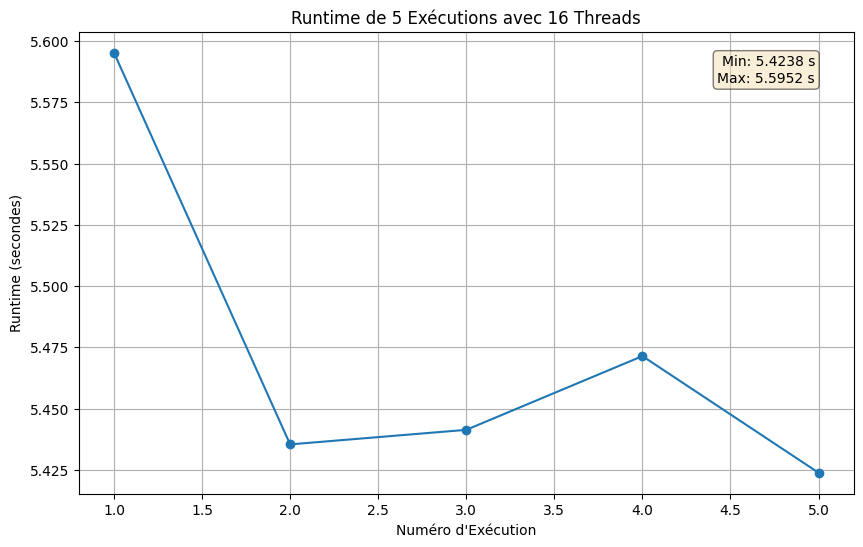

In [36]:
import threading
import time
import matplotlib.pyplot as plt

def tache(identifiant, n):
    """Simule une tâche qui prend du temps."""
    resultat = 0
    for i in range(n):
        resultat += i * identifiant
        time.sleep(0.0001) # Simuler un peu d'IO ou de travail
    print(f"Thread {identifiant} terminé. Résultat partiel: {resultat}")

def execution_avec_threads(nombre_threads, taille_tache):
    """Exécute des tâches en utilisant des threads et mesure le runtime."""
    threads = []
    start_time = time.time()
    for i in range(nombre_threads):
        thread = threading.Thread(target=tache, args=(i + 1, taille_tache))
        threads.append(thread)
        thread.start()

    for thread in threads:
        thread.join()

    end_time = time.time()
    runtime = end_time - start_time
    print(f"\nTemps d'exécution total avec {nombre_threads} threads: {runtime:.4f} secondes")
    return runtime


if __name__ == "__main__":
    num_threads = 16
    taille_de_la_tache = 10000
    num_executions = 5 # Nombre de fois à exécuter le code

    runtimes = []
    execution_numbers = list(range(1, num_executions + 1))

    print(f"Début des tests d'exécution avec {num_threads} threads, {num_executions} fois:")

    for i in range(num_executions):
        print(f"\n--- Exécution {i+1} ---")
        runtime = execution_avec_threads(num_threads, taille_de_la_tache)
        runtimes.append(runtime)

    min_runtime = min(runtimes)
    max_runtime = max(runtimes)

    # Préparation des données pour la courbe
    plt.figure(figsize=(10, 6))
    plt.plot(execution_numbers, runtimes, marker='o')
    plt.title(f"Runtime de {num_executions} Exécutions avec {num_threads} Threads")
    plt.xlabel("Numéro d'Exécution")
    plt.ylabel("Runtime (secondes)")
    plt.grid(True)

    # Ajouter le min et max runtime en haut à droite
    textstr = '\n'.join((
        f'Min: {min_runtime:.4f} s',
        f'Max: {max_runtime:.4f} s'))

    # Ces propriétés personnalisées peuvent être facilement ajustées
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

    # Placez un bloc de texte dans l'axe en haut à droite.
    plt.text(0.95, 0.95, textstr, transform=plt.gca().transAxes, fontsize=10,
            verticalalignment='top', horizontalalignment='right', bbox=props)

    # Afficher le graphique
    plt.show()

In [22]:
import os

num_threads = os.cpu_count()
print(f"Votre machine possède {num_threads} threads logiques.")

Votre machine possède 8 threads logiques.


C:\Users\Soraya Khene\AppData\Local\Temp\ipykernel_22156\4063881714.py:24: RuntimeWarning: overflow encountered in scalar add
  local_sum += x * x
C:\Users\Soraya Khene\AppData\Local\Temp\ipykernel_22156\4063881714.py:62: RuntimeWarning: overflow encountered in scalar add
  somme_totale = sum(resultats)


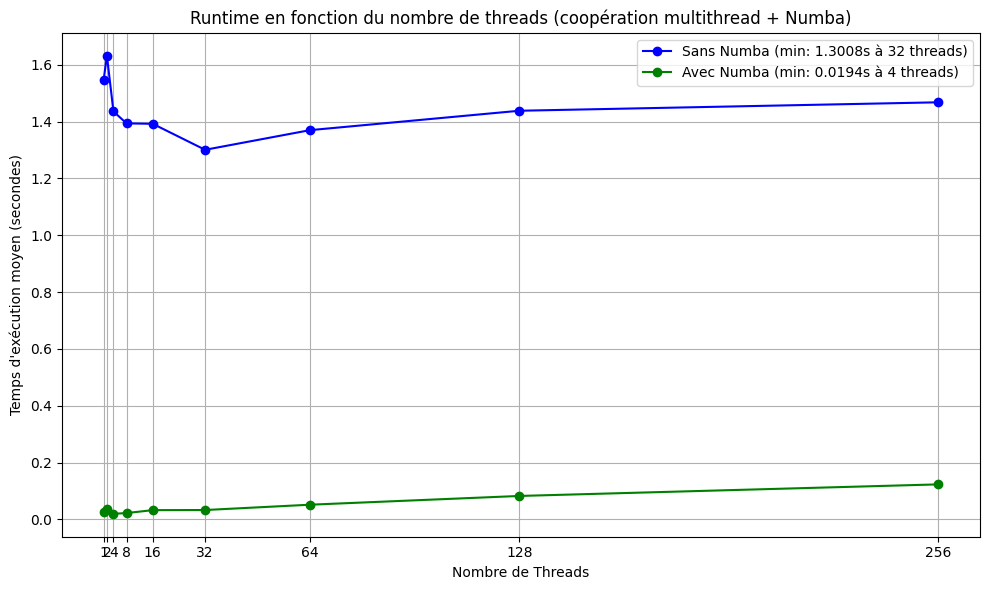

In [ ]:
import threading
import time
import numba
import numpy as np
import matplotlib.pyplot as plt

# Taille du problème
TAILLE = 10_000_000
DONNEES = np.arange(TAILLE)
NOMBRE_EXECUTIONS = 3  # Moyenne sur plusieurs exécutions
THREADS_LIST = [1, 2, 4, 8, 16, 32, 64, 128, 256]  # Liste des nombres de threads à tester

# Résultats
runtimes_sans_numba = []
runtimes_avec_numba = []

# Verrou pour accès concurrent
verrou = threading.Lock()

# Partie sans Numba
def somme_carres_sans_numba(donnees, resultats, index):
    local_sum = 0
    for x in donnees:
        local_sum += x * x
    with verrou:
        resultats[index] = local_sum

# Partie avec Numba
@numba.jit(nopython=True)
def somme_numba(donnees):
    local_sum = 0
    for x in donnees:
        local_sum += x * x
    return local_sum

def thread_avec_numba(donnees, resultats, index):
    resultats[index] = somme_numba(donnees)

# Exécution multithread
def executer_threads(nb_threads, use_numba):
    taille_par_thread = TAILLE // nb_threads
    resultats = [0] * nb_threads
    threads = []

    start = time.time()
    for i in range(nb_threads):
        debut = i * taille_par_thread
        fin = (i + 1) * taille_par_thread if i != nb_threads - 1 else TAILLE
        sous_liste = DONNEES[debut:fin]

        if use_numba:
            thread = threading.Thread(target=thread_avec_numba, args=(sous_liste, resultats, i))
        else:
            thread = threading.Thread(target=somme_carres_sans_numba, args=(sous_liste, resultats, i))
        threads.append(thread)
        thread.start()

    for thread in threads:
        thread.join()
    end = time.time()

    somme_totale = sum(resultats)
    return end - start

# Compiler Numba au début
somme_numba(np.array([1, 2, 3]))

# Boucle pour chaque configuration de threads
for nb_threads in THREADS_LIST:
    total_time_sans = 0
    total_time_avec = 0
    for _ in range(NOMBRE_EXECUTIONS):
        total_time_sans += executer_threads(nb_threads, use_numba=False)
        total_time_avec += executer_threads(nb_threads, use_numba=True)
    runtimes_sans_numba.append(total_time_sans / NOMBRE_EXECUTIONS)
    runtimes_avec_numba.append(total_time_avec / NOMBRE_EXECUTIONS)

# Trouver optimum
min_idx_sans = np.argmin(runtimes_sans_numba)
min_idx_avec = np.argmin(runtimes_avec_numba)

# Tracé
plt.figure(figsize=(10, 6))
plt.plot(THREADS_LIST, runtimes_sans_numba, marker='o', label=f'Sans Numba (min: {runtimes_sans_numba[min_idx_sans]:.4f}s à {THREADS_LIST[min_idx_sans]} threads)', color='blue')
plt.plot(THREADS_LIST, runtimes_avec_numba, marker='o', label=f'Avec Numba (min: {runtimes_avec_numba[min_idx_avec]:.4f}s à {THREADS_LIST[min_idx_avec]} threads)', color='green')

# Affichage
plt.title("Runtime en fonction du nombre de threads (coopération multithread + Numba)")
plt.xlabel("Nombre de Threads")
plt.ylabel("Temps d'exécution moyen (secondes)")
plt.xticks(THREADS_LIST)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

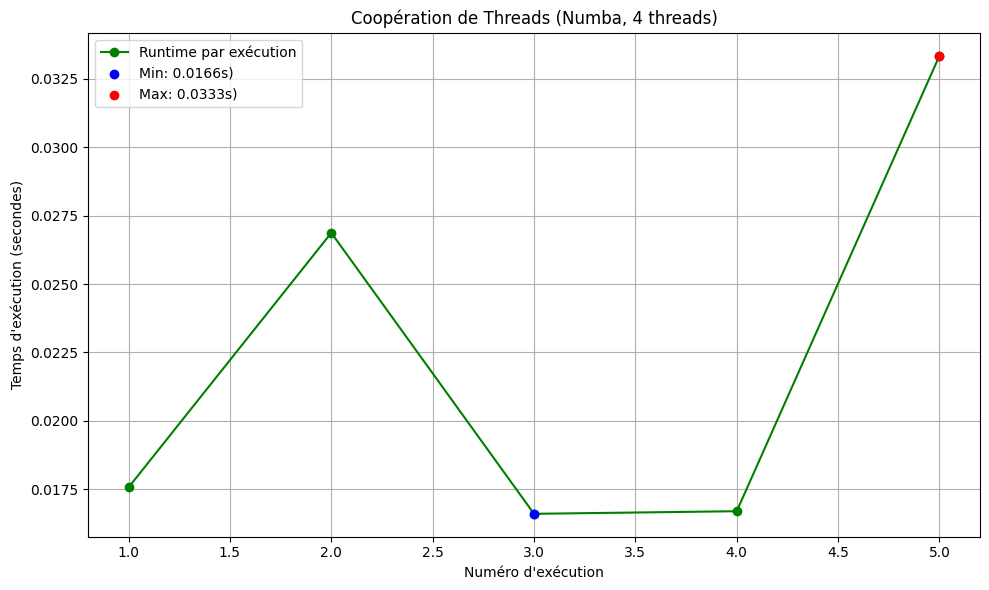

In [31]:
import threading
import time
import numba
import numpy as np
import matplotlib.pyplot as plt

# Créer une grande liste de nombres
TAILLE = 10_000_000
DONNEES = np.arange(TAILLE)

# Paramètres
NB_THREADS = 4
NOMBRE_EXECUTIONS = 5
runtimes_avec_numba = []

# Fonction Numba
@numba.jit(nopython=True)
def somme_numba(donnees):
    local_sum = 0
    for x in donnees:
        local_sum += x * x
    return local_sum

# Fonction exécutée par chaque thread
def thread_avec_numba(donnees, resultats, index):
    resultats[index] = somme_numba(donnees)

def executer_threads_numba():
    threads = []
    taille_par_thread = TAILLE // NB_THREADS
    resultats = [0] * NB_THREADS

    start = time.time()

    for i in range(NB_THREADS):
        debut = i * taille_par_thread
        fin = (i + 1) * taille_par_thread if i < NB_THREADS - 1 else TAILLE
        sous_liste = DONNEES[debut:fin]
        thread = threading.Thread(target=thread_avec_numba, args=(sous_liste, resultats, i))
        threads.append(thread)
        thread.start()

    for thread in threads:
        thread.join()

    somme_totale = sum(resultats)
    end = time.time()
    return end - start

# Compilation initiale Numba
somme_numba(np.array([1, 2, 3]))

# Mesure des temps d'exécution
for i in range(NOMBRE_EXECUTIONS):
    runtime = executer_threads_numba()
    runtimes_avec_numba.append(runtime)

# Trouver les min et max
min_val = min(runtimes_avec_numba)
max_val = max(runtimes_avec_numba)
idx_min = runtimes_avec_numba.index(min_val) + 1
idx_max = runtimes_avec_numba.index(max_val) + 1

# Affichage du graphique
plt.figure(figsize=(10, 6))
plt.plot(range(1, NOMBRE_EXECUTIONS + 1), runtimes_avec_numba, marker='o', color='green', label="Runtime par exécution")
plt.scatter(idx_min, min_val, color='blue', label=f"Min: {min_val:.4f}s)", zorder=5)
plt.scatter(idx_max, max_val, color='red', label=f"Max: {max_val:.4f}s)", zorder=5)

plt.xlabel("Numéro d'exécution")
plt.ylabel("Temps d'exécution (secondes)")
plt.title("Coopération de Threads (Numba, 4 threads)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


## Simulation app Big Data

Début des tests avec différentes tailles de dataset:

--- Test avec une taille de dataset de 100 enregistrements ---
Génération du dataset...
Dataset généré.
Début du traitement du dataset...
Traitement terminé.
Nombre d'enregistrements traités: 100
Nombre de résultats: 25
Temps de traitement: 0.0772 secondes

--- Test avec une taille de dataset de 1000 enregistrements ---
Génération du dataset...
Dataset généré.
Début du traitement du dataset...
Traitement terminé.
Nombre d'enregistrements traités: 1000
Nombre de résultats: 256
Temps de traitement: 0.6669 secondes

--- Test avec une taille de dataset de 10000 enregistrements ---
Génération du dataset...
Dataset généré.
Début du traitement du dataset...
Traitement terminé.
Nombre d'enregistrements traités: 10000
Nombre de résultats: 2540
Temps de traitement: 7.1181 secondes

--- Test avec une taille de dataset de 100000 enregistrements ---
Génération du dataset...
Dataset généré.
Début du traitement du dataset...
Traitement terminé.
No

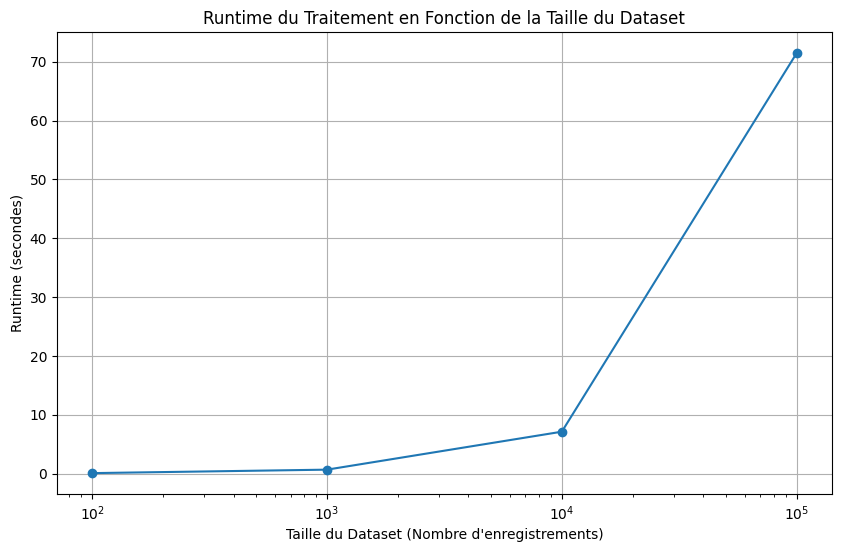

In [42]:
import time
import random
import matplotlib.pyplot as plt

def generer_dataset(taille):
    """Génère un dataset simulé pour une application big data."""
    dataset = []
    for i in range(taille):
        record = {
            'id': i,
            'valeur': random.randint(1, 100),
            'categorie': random.choice(['A', 'B', 'C', 'D']),
            'timestamp': time.time() - random.randint(0, 3600 * 24 * 30) # Données sur 30 jours
        }
        dataset.append(record)
    return dataset

def traiter_dataset(dataset):
    """Simule le traitement d'un dataset big data."""
    resultats = []
    for record in dataset:
        if record['valeur'] > 50 and record['categorie'] in ['A', 'C']:
            resultats.append({'id': record['id'], 'processed_value': record['valeur'] * 2})
        time.sleep(0.00001) # Simuler un petit délai de traitement par enregistrement
    return resultats

if __name__ == "__main__":
    dataset_sizes = [100, 1000, 10000, 100000]
    runtimes = []

    print("Début des tests avec différentes tailles de dataset:")

    for taille in dataset_sizes:
        print(f"\n--- Test avec une taille de dataset de {taille} enregistrements ---")
        print(f"Génération du dataset...")
        dataset = generer_dataset(taille)
        print("Dataset généré.")

        print("Début du traitement du dataset...")
        start_time = time.time()
        resultats_traitement = traiter_dataset(dataset)
        end_time = time.time()
        duree_traitement = end_time - start_time
        runtimes.append(duree_traitement)
        print("Traitement terminé.")

        print(f"Nombre d'enregistrements traités: {len(dataset)}")
        print(f"Nombre de résultats: {len(resultats_traitement)}")
        print(f"Temps de traitement: {duree_traitement:.4f} secondes")

    # Préparation des données pour la courbe
    plt.figure(figsize=(10, 6))
    plt.plot(dataset_sizes, runtimes, marker='o')
    plt.title("Runtime du Traitement en Fonction de la Taille du Dataset")
    plt.xlabel("Taille du Dataset (Nombre d'enregistrements)")
    plt.ylabel("Runtime (secondes)")
    plt.grid(True)
    plt.xscale('log') # Utiliser une échelle logarithmique pour l'axe des x (taille du dataset)
    plt.yscale('linear')
    plt.show()

In [1]:
import psutil
import platform

# Nom du CPU
print(f"Nom du processeur : {platform.processor()}")

# Nombre de cœurs physiques (ex. : 4)
print(f"Cœurs physiques   : {psutil.cpu_count(logical=False)}")

# Nombre total de threads logiques (ex. : 8 avec HyperThreading)
print(f"Cœurs logiques    : {psutil.cpu_count(logical=True)}")

# Fréquence actuelle du CPU
freq = psutil.cpu_freq()
if freq:
    print(f"Fréquence actuelle: {freq.current:.2f} MHz")
    print(f"Fréquence min     : {freq.min:.2f} MHz")
    print(f"Fréquence max     : {freq.max:.2f} MHz")
else:
    print("Fréquence CPU non disponible sur ce système.")


Nom du processeur : Intel64 Family 6 Model 142 Stepping 10, GenuineIntel
Cœurs physiques   : 4
Cœurs logiques    : 8
Fréquence actuelle: 1910.00 MHz
Fréquence min     : 0.00 MHz
Fréquence max     : 2112.00 MHz


## Courbe evaluation after train

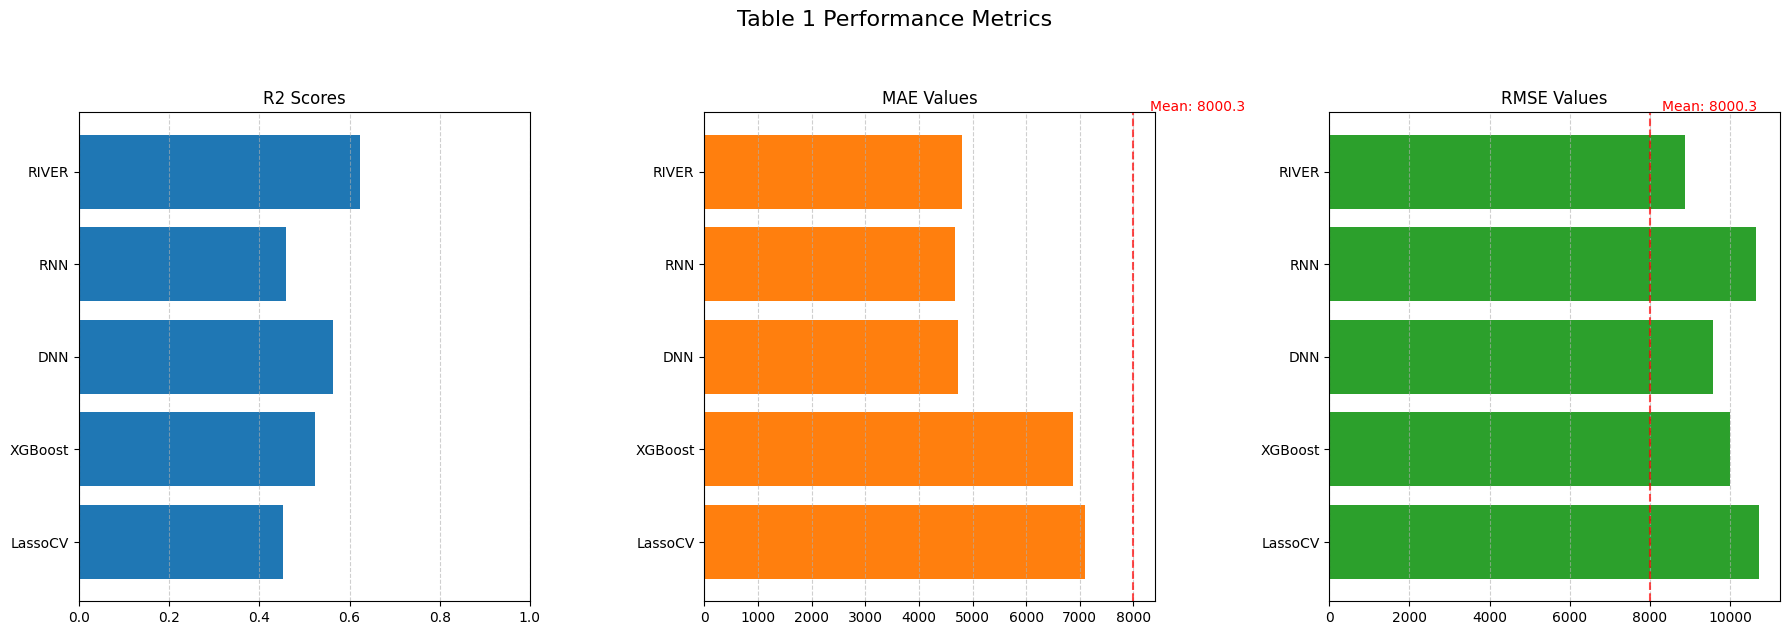

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Data for Table 1
models = ['LassoCV', 'XGBoost', 'DNN', 'RNN', 'RIVER']
r2_1 = [0.452, 0.523, 0.563, 0.459, 0.622]
mae_1 = [7094.78, 6877.79, 4734.58, 4678.04, 4811.51]
rmse_1 = [10714.37, 9995.52, 9566.79, 10638.79, 8889.77]
mean_value = 8000.3

# Create figure for Table 1
fig1, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))
fig1.suptitle('Table 1 Performance Metrics', fontsize=16, y=1.05)

# R2 Plot
ax1.barh(models, r2_1, color='#1f77b4')
ax1.set_title('R2 Scores')
ax1.set_xlim(0, 1)
ax1.grid(True, axis='x', linestyle='--', alpha=0.6)

# MAE Plot
ax2.barh(models, mae_1, color='#ff7f0e')
ax2.axvline(mean_value, color='red', linestyle='--', linewidth=1.5, alpha=0.7)
ax2.text(mean_value+300, 4.7, f'Mean: {mean_value}', color='red', va='center')
ax2.set_title('MAE Values')
ax2.grid(True, axis='x', linestyle='--', alpha=0.6)

# RMSE Plot
ax3.barh(models, rmse_1, color='#2ca02c')
ax3.axvline(mean_value, color='red', linestyle='--', linewidth=1.5, alpha=0.7)
ax3.text(mean_value+300, 4.7, f'Mean: {mean_value}', color='red', va='center')
ax3.set_title('RMSE Values')
ax3.grid(True, axis='x', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

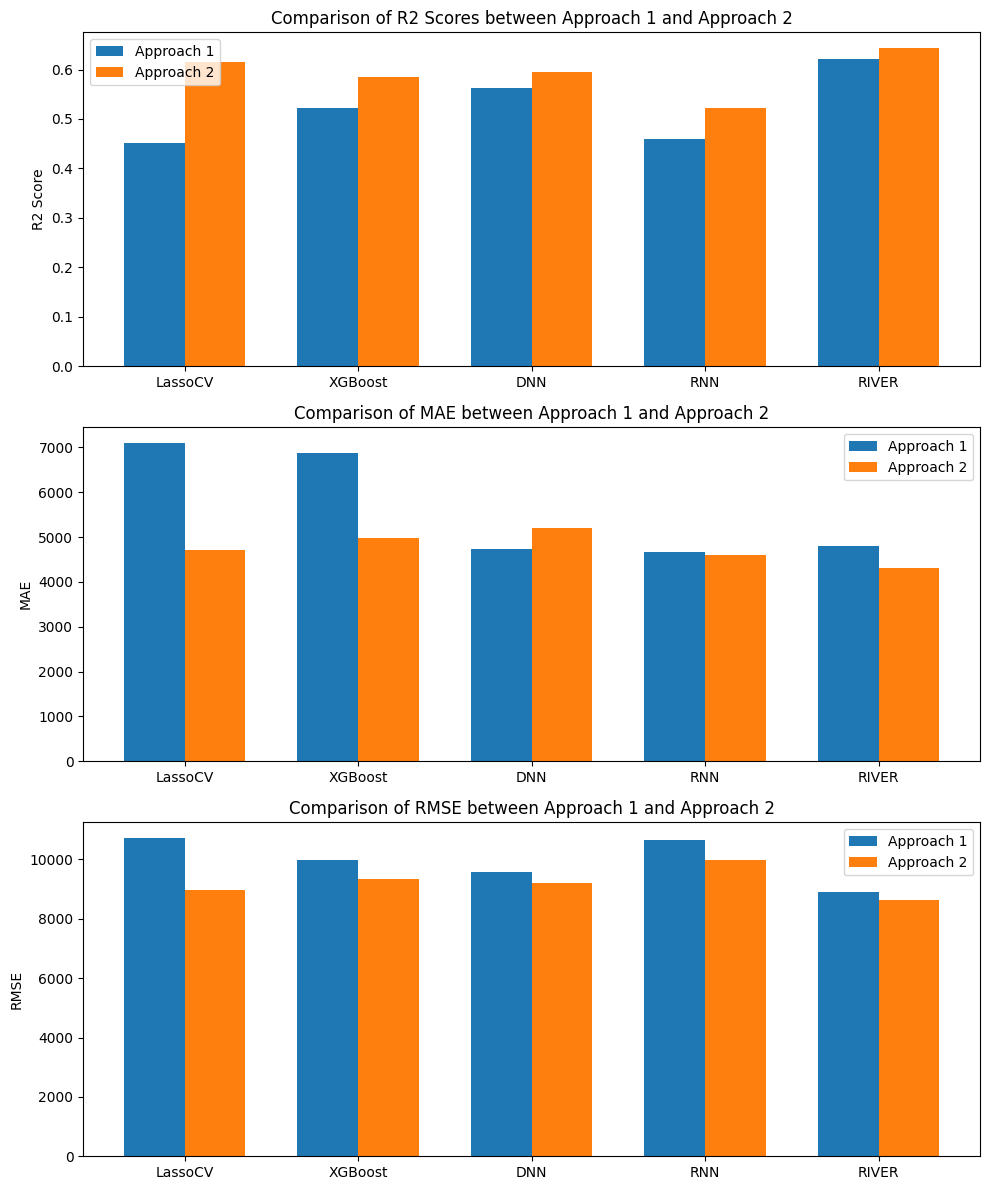

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Data from first table
models = ['LassoCV', 'XGBoost', 'DNN', 'RNN', 'RIVER']
table1_r2 = [0.452, 0.523, 0.563, 0.459, 0.622]
table1_mae = [7094.78, 6877.79, 4734.58, 4678.04, 4811.51]
table1_rmse = [10714.37, 9995.52, 9566.79, 10638.79, 8889.77]

# Data from second table
table2_r2 = [0.616, 0.584, 0.594, 0.523, 0.643]
table2_mae = [4713.40, 4985.35, 5204.80, 4606.47, 4318.20]
table2_rmse = [8962.33, 9336.47, 9214.45, 9993.91, 8640.90]

x = np.arange(len(models))  # the label locations
width = 0.35  # the width of the bars

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 12))

# R2 plot
rects1 = ax1.bar(x - width/2, table1_r2, width, label='Approach 1')
rects2 = ax1.bar(x + width/2, table2_r2, width, label='Approach 2')
ax1.set_ylabel('R2 Score')
ax1.set_title('Comparison of R2 Scores between Approach 1 and Approach 2')
ax1.set_xticks(x)
ax1.set_xticklabels(models)
ax1.legend()

# MAE plot
rects3 = ax2.bar(x - width/2, table1_mae, width, label='Approach 1')
rects4 = ax2.bar(x + width/2, table2_mae, width, label='Approach 2')
ax2.set_ylabel('MAE')
ax2.set_title('Comparison of MAE between Approach 1 and Approach 2')
ax2.set_xticks(x)
ax2.set_xticklabels(models)
ax2.legend()

# RMSE plot
rects5 = ax3.bar(x - width/2, table1_rmse, width, label='Approach 1')
rects6 = ax3.bar(x + width/2, table2_rmse, width, label='Approach 2')
ax3.set_ylabel('RMSE')
ax3.set_title('Comparison of RMSE between Approach 1 and Approach 2')
ax3.set_xticks(x)
ax3.set_xticklabels(models)
ax3.legend()

plt.tight_layout()
plt.show()

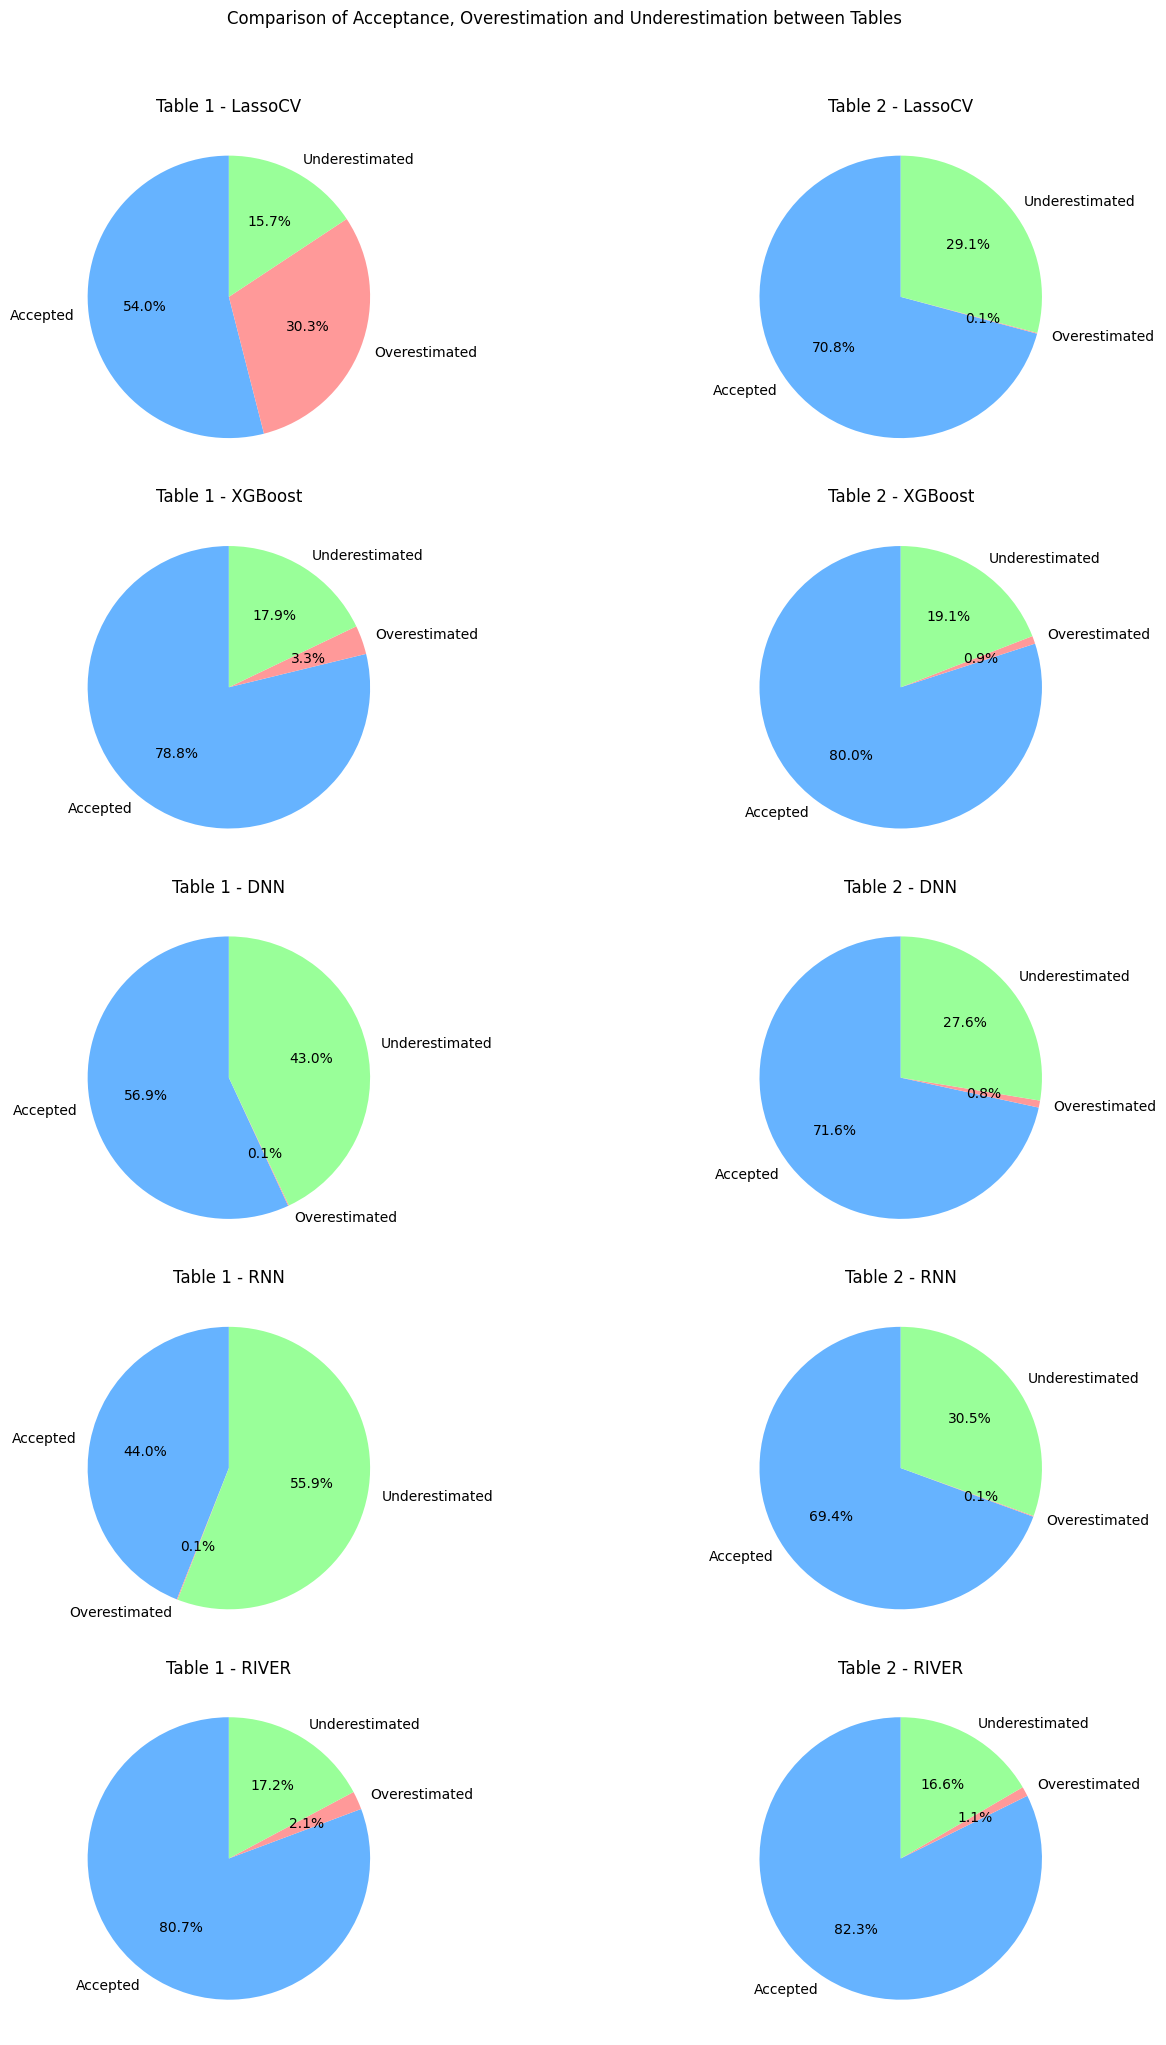

In [3]:
import matplotlib.pyplot as plt

# Data from both tables
models = ['LassoCV', 'XGBoost', 'DNN', 'RNN', 'RIVER']

# Table 1 data (Accepté, Suré, Sousé)
table1_accept = [54.0, 78.8, 56.9, 44.0, 80.7]
table1_over = [30.3, 3.3, 0.1, 0.1, 2.1]
table1_under = [15.7, 17.9, 43.0, 55.9, 17.2]  # Calculated as 100 - accept - over

# Table 2 data (Accepté, Suré, Sousé)
table2_accept = [70.8, 80.0, 71.6, 69.4, 82.4]
table2_over = [0.1, 0.9, 0.8, 0.1, 1.1]
table2_under = [29.1, 19.1, 27.6, 30.5, 16.6]  # Calculated as 100 - accept - over

# Create a figure with subplots
fig, axes = plt.subplots(5, 2, figsize=(15, 20))
fig.suptitle('Comparison of Acceptance, Overestimation and Underestimation between Tables', y=1.02)

# Plot pie charts for each model
for i, model in enumerate(models):
    # Table 1 pie chart
    axes[i, 0].pie([table1_accept[i], table1_over[i], table1_under[i]],
                   labels=['Accepted', 'Overestimated', 'Underestimated'],
                   autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#ff9999', '#99ff99'])
    axes[i, 0].set_title(f'Table 1 - {model}')
    
    # Table 2 pie chart
    axes[i, 1].pie([table2_accept[i], table2_over[i], table2_under[i]],
                   labels=['Accepted', 'Overestimated', 'Underestimated'],
                   autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#ff9999', '#99ff99'])
    axes[i, 1].set_title(f'Table 2 - {model}')

plt.tight_layout()
plt.show()